In [19]:
%load_ext autoreload
%autoreload 2
#* magic to add python path to notebook environment
import sys
pypath = sys.path[0]
%env PYTHONPATH $pypath

import awkward as ak
import numpy as np

from apps import cex_analyse, cex_toy_parameters
from python.analysis import cross_section, Master, Plots
from rich import print
cross_section.SetPlotStyle(True, dpi = 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: PYTHONPATH=/home/sb16165/Documents/pi0-analysis/analysis


In [7]:
config = "work/2023/cex_analysis_1GeV_config.json"
args = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration(config))

In [8]:
mc = Master.Data(args.mc_file, nTuple_type = args.ntuple_type)

In [9]:
toy = cross_section.Toy(file = "work/2023/toys/xs_toy_1GeV_gaussian_60MeV_PDSP_stats.hdf5")

In [10]:
analysis_input_mc = cex_analyse.CreateAnalysisInput(mc, args, True)
analysis_input_toy = cex_analyse.CreateAnalysisInput(toy, args, True)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to event_index.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply f

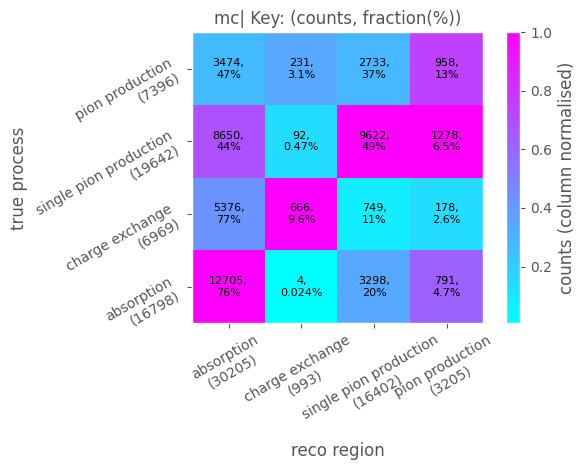

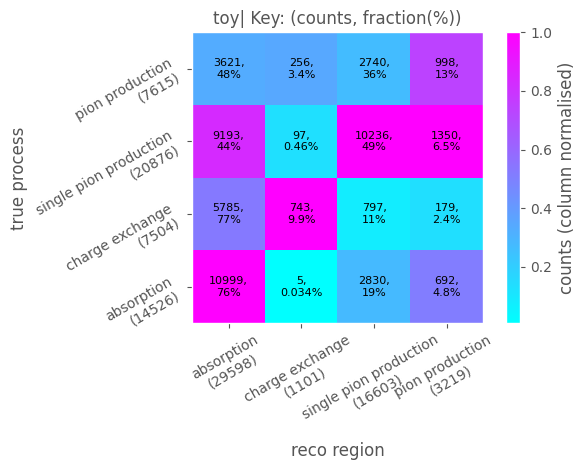

In [17]:
# print(analysis_input_mc)
# print(analysis_input_toy)
counts = cross_section.Toy.ComputeCounts(analysis_input_mc.exclusive_process, analysis_input_mc.regions)
cex_toy_parameters.PlotCorrelationMatrix(counts, list(analysis_input_mc.exclusive_process.keys()), list(analysis_input_mc.regions.keys()), "mc")
counts = cross_section.Toy.ComputeCounts(analysis_input_toy.exclusive_process, analysis_input_toy.regions)
cex_toy_parameters.PlotCorrelationMatrix(counts, list(analysis_input_toy.exclusive_process.keys()), list(analysis_input_toy.regions.keys()), "toy")

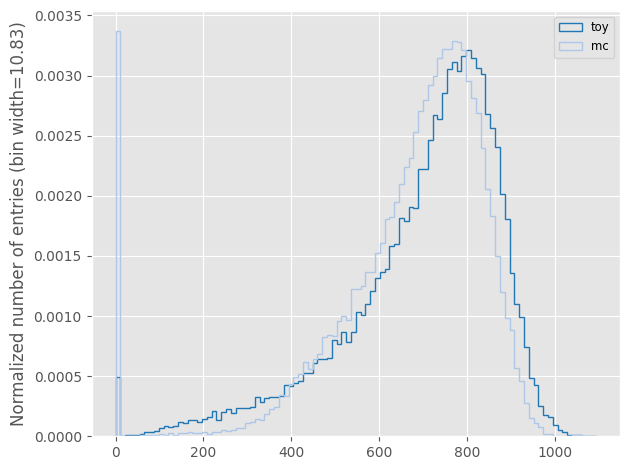

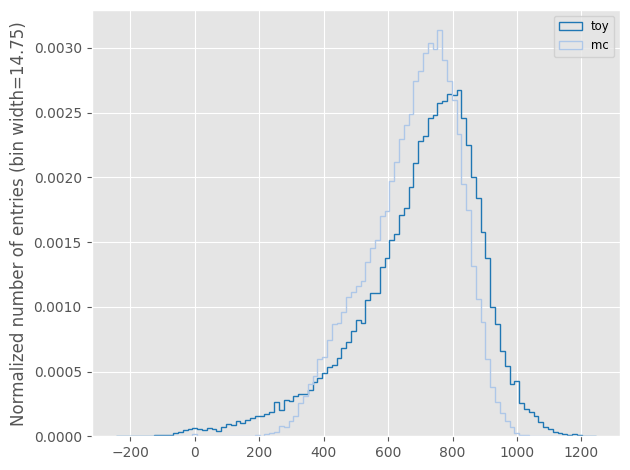

In [20]:
Plots.PlotHistComparison([analysis_input_toy.KE_int_true, analysis_input_mc.KE_int_true], labels = ["toy", "mc"])
Plots.PlotHistComparison([analysis_input_toy.KE_int_reco, analysis_input_mc.KE_int_reco], labels = ["toy", "mc"])

In [21]:
mask = mc.trueParticles.pdg[:, 0] == 211
mc_true_selection = mc.Filter([mask], [mask], returnCopy = True)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


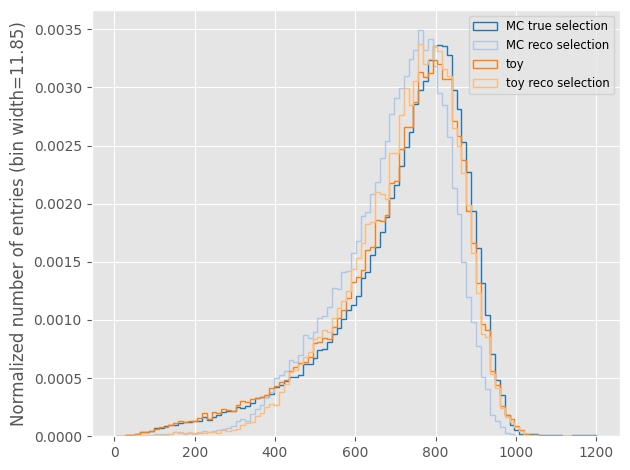

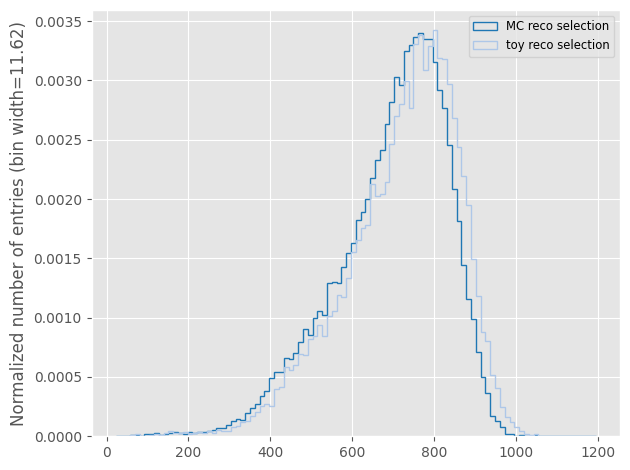

In [41]:
KE_int_true = mc_true_selection.trueParticles.beam_traj_KE[:, -2]
Plots.PlotHistComparison([KE_int_true, analysis_input_mc.KE_int_true, analysis_input_toy.KE_int_true, analysis_input_toy.KE_int_true[toy.df.beam_selection_mask]], labels = ["MC true selection", "MC reco selection", "toy", "toy reco selection"], x_range = [0, 1200], bins = 100)
Plots.PlotHistComparison([analysis_input_mc.KE_int_true, analysis_input_toy.KE_int_true[toy.df.beam_selection_mask]], labels = ["MC reco selection", "toy reco selection"], x_range = [0, 1200], bins = 100)
